當前工作目錄 ==> /home/jovyan
Laser cut boundary has 349 rows
         each rows has 209 columns




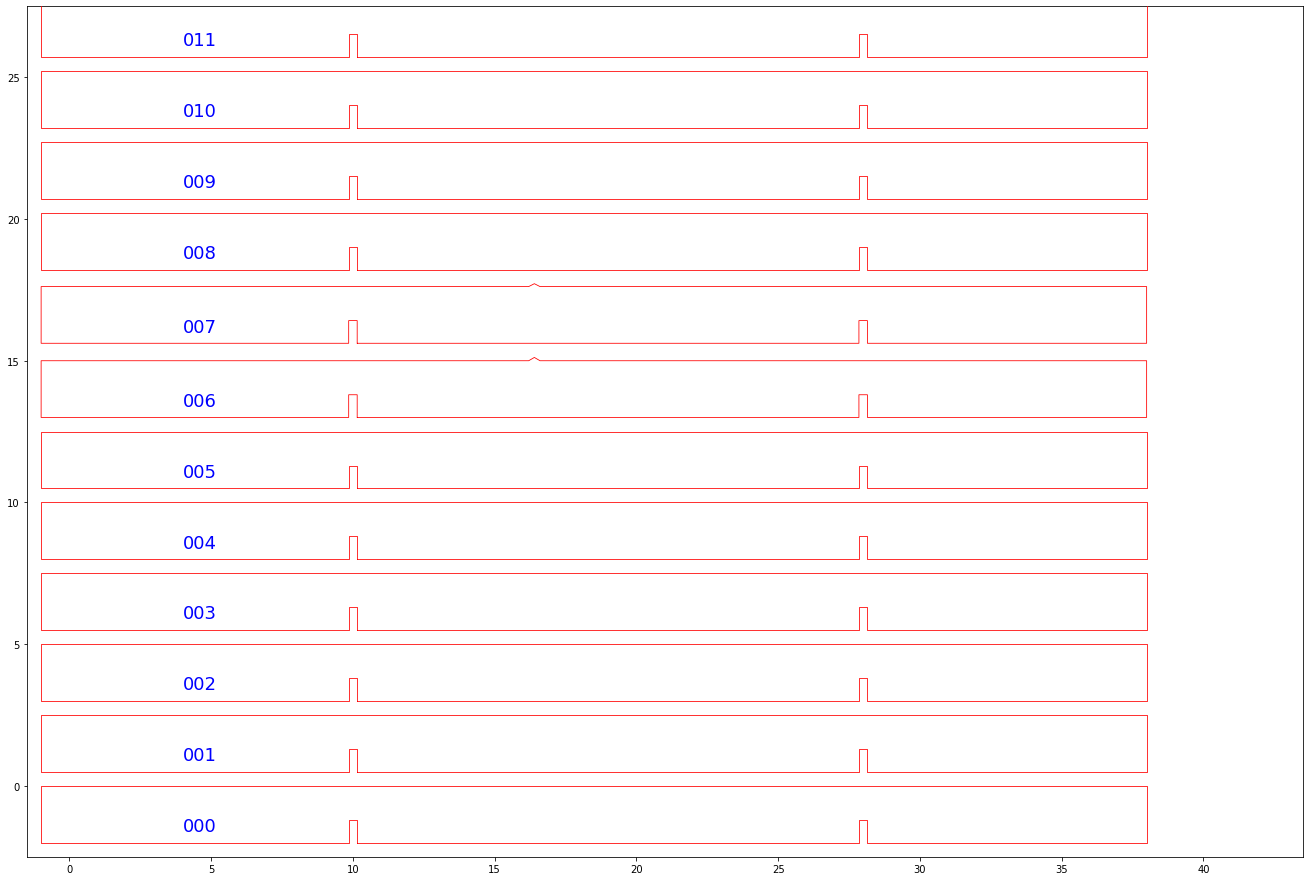

30.218
Done


In [30]:
# stl-SSNP-12B-cut-plates-along-Y-axis_SVG.py
# 2021-12-12
#
# pickle 是 Python 的內建模組
# read 349x196x3_XYZ.dat file
#
import os
path = os.getcwd()
print('當前工作目錄 ==>', path)
#
from shapely.geometry  import LineString
from operator import itemgetter
#
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams.update({'figure.max_open_warning': 0})
import pprint
import pickle
#
path_data    = './data/'
path_graphic = './graphic/'
#
def set_graphic_area(width,height) :
        
    cm2inch = 1/2.54    # inch per cm
    #
    # define graphic area
    #
    left_margin = 1.0   # cm
    right_margin = 1.0  # cm
    #
    figure_width  = width  # cm , from xmin to xmax
    figure_height = height # cm , from ymin to ymax
    #
    top_margin = 1.0    # cm
    bottom_margin = 1.0 # cm
    #
    box_width = left_margin + figure_width + right_margin   # cm
    box_height = top_margin + figure_height + bottom_margin # cm
    #
    top_value    = 1.0 - top_margin / box_height
    bottom_value = bottom_margin / box_height
    left_value   = left_margin / box_width
    right_value  = 1.0 - right_margin / box_width
    #
    return (box_width*cm2inch,box_height*cm2inch,top_value,bottom_value,left_value,right_value,width)
#
# end of def
#
def motif_line(LS, MYcolor, ZORDER, LINEWIDTH) :
    #
    xs, ys = LS.xy
    plt.plot(xs, ys, color=MYcolor, alpha=1.0, linewidth=LINEWIDTH, solid_capstyle='round', zorder=ZORDER)
    return
#
def motif_fill(LS, color, ZORDER, Alpha) :
    #
    xs, ys = LS.xy
    plt.fill(xs, ys, alpha=Alpha, closed=True, edgecolor=None, facecolor=color, fill=True, zorder=ZORDER)
    return
#
def new_plot_setting() :
    tup7 = set_graphic_area(45,30)
    fig = plt.figure(figsize=(tup7[0], tup7[1]))
    fig.subplots_adjust(
                top    = tup7[2] ,
                bottom = tup7[3] ,
                left   = tup7[4] ,
                right  = tup7[5] ,
                )
    #
    plt.xlim(-1.5, 43.5)    # 設定X軸的顯示範圍, from xmin to xmax
    plt.ylim(-2.5, 27.5)    # 設定Y軸的顯示範圍, from ymin to ymax
    #
    plt.grid(False)
    plt.axis('on')
    plt.gca().set_aspect('equal', adjustable='box') # set X,Y same ratio & scale
# end def
#
## ================================================================
#
# tup7 is type of Tuple, have 7 indexed value
#
tup7 = set_graphic_area(45, 30)  
fig = plt.figure(figsize=(tup7[0], tup7[1])) # 呼叫 pyplot.figure(), 建立一個圖表物件, 並成為目前圖表物件
fig.subplots_adjust(
                top    = tup7[2] ,
                bottom = tup7[3] ,
                left   = tup7[4] ,
                right  = tup7[5] ,
                )
#
plt.xlim(-1.5, 43.5)    # 設定X軸的顯示範圍, from xmin to xmax
plt.ylim(-2.5, 27.5)    # 設定Y軸的顯示範圍, from ymin to ymax
#
plt.grid(False)
plt.axis('on')
plt.gca().set_aspect('equal', adjustable='box')
#
## ================================================================
#
with open(path_data + '349x196x3_XYZ.dat', 'rb') as in_file :
    dem_rows = pickle.load(in_file)
# end with    
#
# up layer verteices
A_up = [38.0, 90.0, 0.0] # 0
B_up = [-1.0, 90.0, 0.0] # 1
C_up = [-1.0, 20.4, 0.0] # 2
D_up = [38.0, 20.4, 0.0] # 3
#
# down layer verteices
a_dn = [38.0, 90.0,-2.0] # 4
b_dn = [-1.0, 90.0,-2.0] # 5
c_dn = [-1.0, 20.4,-2.0] # 6
d_dn = [38.0, 20.4,-2.0] # 7
#
left_dn_xy  = (-1.0,-2.0)
left_up_xy  = (-1.0, 0.0)
# ... here is the dem boundary line
right_up_xy = (38.0, 0.0)
right_dn_xy = (38.0,-2.0)
#
left_open_cut_xy  = [(10.15, -2) , (10.15, -1.2), ( 9.85, -1.2), ( 9.85, -2)]
right_open_cut_xy = [(28.15, -2) , (28.15, -1.2), (27.85, -1.2), (27.85, -2)]
#
rows = []
for i in range(0,349,1) :
    XYZ_tuple_row = [(XYZ[0], round(XYZ[2],3)) for XYZ in dem_rows[i]]
    Laser_Cut_Boundary = left_open_cut_xy + [left_dn_xy,left_up_xy] + XYZ_tuple_row + [right_up_xy, right_dn_xy] + right_open_cut_xy + [(10.15, -2)]
    rows.append(Laser_Cut_Boundary)
# end for
#
print('Laser cut boundary has', len(rows),    'rows')
print('         each rows has', len(rows[0]), 'columns')
print ('\n')
#
y_max_list = []
for row in rows :
    y_max_list.append(max(row,key=itemgetter(1))[1])
# end for
# print('total', len(rows))
# print(y_max_list)
#
i = 0
y_sum = 0.0
data_rows = rows[i:i+15]
for row in data_rows :
    if len(str(i)) == 1 :
        i_str = "00" + str(i)
    elif len(str(i)) == 2 :
        i_str = "0" + str(i)
    else :
        i_str = str(i)
    # end if
    #
    if i == 0 :
        boundary_line = LineString(row)
        motif_line(boundary_line, 'red', 20, 0.8)
    else :
        row = [(xy[0], xy[1]+y_sum) for xy in row]
        boundary_line = LineString(row)
        motif_line(boundary_line, 'red', 20, 0.8)
    # end if
    #    
    text_str = i_str
    plt.text(4.0, -1.6 + y_sum, text_str, color='blue', fontsize=18, zorder=30)
    #
    y_sum = y_sum + 2 + y_max_list[i] + 0.5
    if y_sum + 2 + y_max_list[i+1] > 30.0 :
        break
    else :
        i = i + 1
        # new_plot_setting()
    #end if
# end for
#
file_id = 'row-' + i_str + '.png'
plt.savefig(path_graphic + "Laser-cut/" + file_id, format="png", dpi=96)
plt.show()
print(y_sum)
print("Done")
